In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


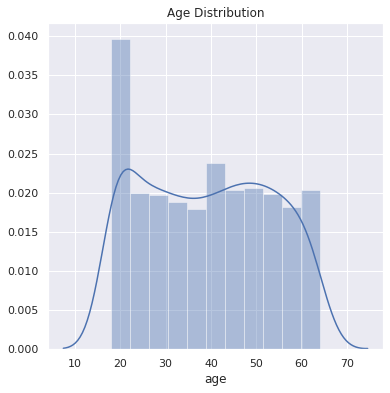

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

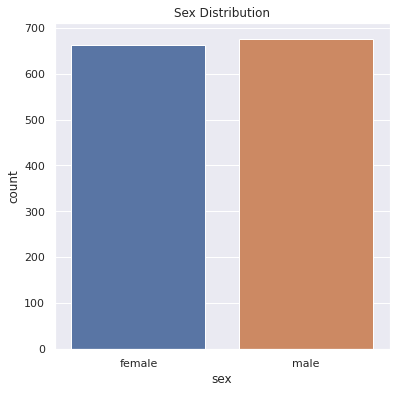

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
sex_dummies = pd.get_dummies(insurance_dataset['sex'])
smoker_dummies = pd.get_dummies(insurance_dataset['smoker'])
region_dummies = pd.get_dummies(insurance_dataset['region'])

In [12]:
sex_dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [13]:
df1 = pd.concat([insurance_dataset,sex_dummies],axis='columns')

In [14]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [15]:
df2 = pd.concat([df1,smoker_dummies],axis='columns')
df2.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0


In [16]:
df3 = pd.concat([df2,region_dummies],axis='columns')
df3.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [17]:
df3.drop(['sex','smoker','region'],axis='columns',inplace=True)

In [18]:
#insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
#insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
#insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [19]:
X = df3.drop(columns='charges', axis=1)
Y = df3['charges']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 11) (1070, 11) (268, 11)


In [22]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [23]:
from tensorflow.keras import models
model = models.Sequential()

In [24]:
from tensorflow.keras.layers import *

In [25]:
model.add(Dense(1024,activation='relu',input_shape=(X_train.shape[-1],)))
model.add(Dense(512,activation='tanh'))
model.add(Dense(1))

In [26]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [27]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
34/34 [==============================] - 2s 29ms/step - loss: 323968384.0000 - mae: 13355.5107
Epoch 2/20
34/34 [==============================] - 1s 28ms/step - loss: 323014944.0000 - mae: 13320.6221
Epoch 3/20
34/34 [==============================] - 1s 28ms/step - loss: 322455840.0000 - mae: 13299.4268
Epoch 4/20
34/34 [==============================] - 1s 29ms/step - loss: 321936000.0000 - mae: 13280.0996
Epoch 5/20
34/34 [==============================] - 1s 28ms/step - loss: 321440480.0000 - mae: 13261.1035
Epoch 6/20
34/34 [==============================] - 1s 29ms/step - loss: 320951424.0000 - mae: 13242.9131
Epoch 7/20
34/34 [==============================] - 1s 34ms/step - loss: 320476608.0000 - mae: 13224.7852
Epoch 8/20
34/34 [==============================] - 1s 27ms/step - loss: 320001664.0000 - mae: 13206.8232
Epoch 9/20
34/34 [==============================] - 1s 24ms/step - loss: 319531808.0000 - mae: 13189.2266
Epoch 10/20
34/34 [===========================